&nbsp;

# Audio Analysis Basics

This notebook is inspired from a tutorial that I was following for pyaudio

### Imports

In [73]:
import pyaudio
import struct
import numpy as np
import matplotlib.pyplot as plt
import wave

In [74]:
%matplotlib inline

### Basic wave plotting

In [75]:
chunk = 1024 * 4
data_format = pyaudio.paInt16
channels = 1
rate = 44100

In [76]:
pyaudio_obj = pyaudio.PyAudio()

stream = pyaudio_obj.open(
    format=data_format,
    channels = channels,
    rate = rate,
    input = True,
    output = True,
    frames_per_buffer=chunk
)

In [77]:
data = stream.read(chunk)

In [78]:
len(data)

8192

In [79]:
data_int = np.array(struct.unpack(str(2  * chunk) + "B", data), dtype="b") + 127
data_int

array([-101, -127,   94, ..., -123,   87, -124], dtype=int8)

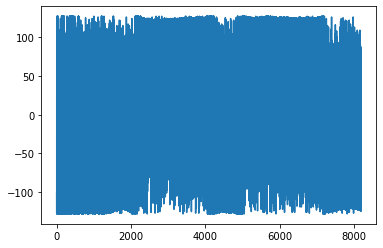

In [80]:
fig, ax = plt.subplots()
ax.plot(data_int, '-')
plt.show()

### Real-time wave plotting

In [81]:
# %matplotlib tk
%matplotlib inline

In [ ]:
fig, ax = plt.subplots()

x = np.arange(0, 2*chunk, 2)
line, = ax.plot(x, np.random.rand(chunk))

ax.set_ylim(0, 255)
ax.set_xlim(0, chunk)

while True:
    data = stream.read(chunk)
    data_int = np.array(struct.unpack(str(2  * chunk) + 'B', data), dtype="b")[::2] #+ 127
    line.set_ydata(data_int)
    fig.canvas.draw()
    fig.canvas.flush_events()

### Saving the mic input to drive

In [83]:
p = pyaudio.PyAudio()

stream = p.open(format=data_format,
                channels=channels,
                rate=rate,
                input=True,
                frames_per_buffer=chunk
)

In [69]:
record_for_seconds = 5
output_filename = "output.wav"

In [70]:
print("* recording")

frames = []

for i in range(0, int(rate / chunk * record_for_seconds)):
    data = stream.read(chunk)
    frames.append(data)

print("* done recording")
stream.stop_stream()
stream.close()
p.terminate()

* recording
* done recording


In [71]:
wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(channels)
wf.setsampwidth(p.get_sample_size(data_format))
wf.setframerate(rate)
wf.writeframes(b''.join(frames))
wf.close()

### Fast Fourier Transform on mic input